In [73]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.diagnostic as diag
from sklearn.model_selection import cross_val_score, train_test_split
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import sklearn.preprocessing
from scipy.stats import normaltest
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
from sklearn.feature_extraction.text import CountVectorizer
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pyclustertend 
from kmodes.kmodes import KModes

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

In [74]:
# Global Variables
seed = random.seed(123)
number_clusters = 3

# Analisis Exploratorio

In [75]:
# Variable classification
data = pd.read_csv('./data.csv', encoding = "ISO-8859-1")
data = data.drop('index', axis=1)

In [76]:
data.head()

,filename,sections,dll,date
0,RTC_7F85D7F628CE62D1D8F7B39D8940472,"[['IMAGE_SECTION_HEADER', '0x1000', '0x1ef000'...","[{'name': b'KERNEL32.DLL', 'functions': ['Load...",Mon May 30 08:29:29 2011 UTC
1,FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2,"[['IMAGE_SECTION_HEADER', '0x1000', '0x5000', ...","[{'name': b'KERNEL32.DLL', 'functions': ['Load...",Thu May 14 17:12:40 2009 UTC
2,1F2EB7B090018D975E6D9B40868C94CA,"[['IMAGE_SECTION_HEADER', '0x1000', '0x5000', ...","[{'name': b'KERNEL32.DLL', 'functions': ['Load...",Fri Jan 15 17:20:56 2010 UTC
3,65018CD542145A3792BA09985734C12A,"[['IMAGE_SECTION_HEADER', '0x1000', '0x5000', ...","[{'name': b'KERNEL32.DLL', 'functions': ['Load...",Sun Nov 18 23:50:13 2007 UTC
4,FHHH6576C196385407B0F7F4B1B537D88983,"[['IMAGE_SECTION_HEADER', '0x1000', '0x5000', ...","[{'name': b'KERNEL32.DLL', 'functions': ['Load...",Thu May 14 17:12:40 2009 UTC


                                        name  count
0           F8437E44748D2C3FCF84019766F4E6DC      1
1       DS22_A670D13D4D014169C4080328B8FEB86      1
2       QW2_4C6BDDCCA2695D6202DF38708E14FC7E      1
3           8442AE37B91F279A9F06DE4C60B286A3      1
4       JH78C0A33A1B472A8C16123FD696A5CE5EBB      1
5       NV99_C9C9DBF388A8D81D8CFB4D3FC05F8E4      1
6           785003A405BC7A4EBCBB21DDB757BF3F      1
7      AAAz2E1B6940985A23E5639450F8391820655      1
8        HJGQDD892986B2249B5214639ECC8AC0223      1
9      KLp90_6D5C8FC4B14559F73B6136D85B94198      1
10   FGTR43_EF8E0FB20E7228C7492CCDC59D87C690      1
11       SAM_B659D71AE168E774FAAF38DB30F4A84      1
12          A316D5AECA269CA865077E7FFF356E7D      1
13     VBMM9_149B7BD7218AAB4E257D28469FDDB0D      1
14      FTTR9EA3C16194CE354C244C1B74C46CD92E      1
15     POL55_A4F1ECC4D25B33395196B5D51A06790      1
16      GFT4_7DDD3D72EAD03C7518F5D47650C8572      1
17   TG78Z__727A6800991EEAD454E53E8AF164A99C      1
18      L11_

<Figure size 1440x360 with 0 Axes>

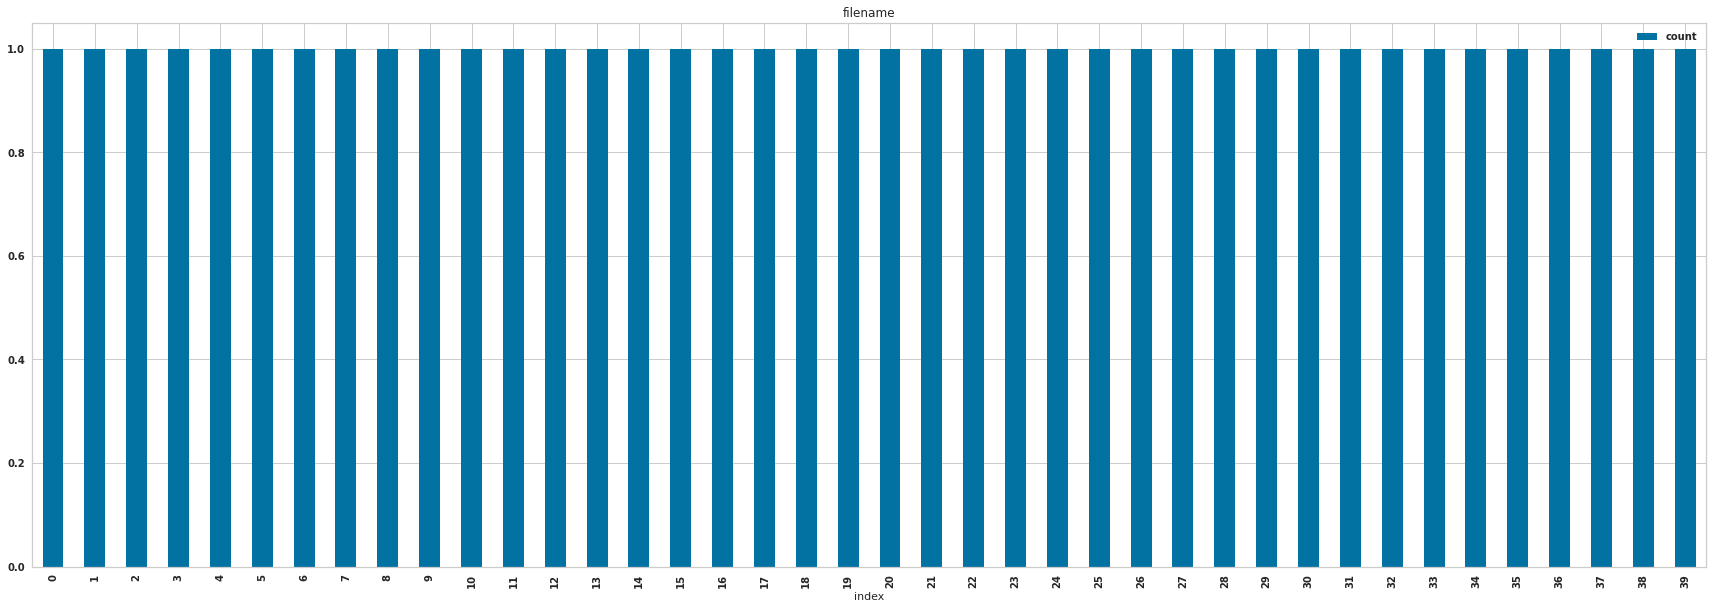

                                                 name  count
0   [['IMAGE_SECTION_HEADER', '0x1000', '0x5000', ...     15
1   [['IMAGE_SECTION_HEADER', '0x1000', '0x5000', ...      6
2   [['IMAGE_SECTION_HEADER', '0x1000', '0x25ca', ...      4
3   [['IMAGE_SECTION_HEADER', '0x1000', '0x70000',...      3
4   [['IMAGE_SECTION_HEADER', '0x1000', '0x1ef000'...      3
5   [['IMAGE_SECTION_HEADER', '0x1000', '0x25da', ...      2
6   [['IMAGE_SECTION_HEADER', '0x1000', '0x5f000',...      2
7   [['IMAGE_SECTION_HEADER', '0x1000', '0x68000',...      2
8   [['IMAGE_SECTION_HEADER', '0x1000', '0x50000',...      1
9   [['IMAGE_SECTION_HEADER', '0x1000', '0x25da', ...      1
10  [['IMAGE_SECTION_HEADER', '0x1000', '0x248a', ...      1


<Figure size 1440x360 with 0 Axes>

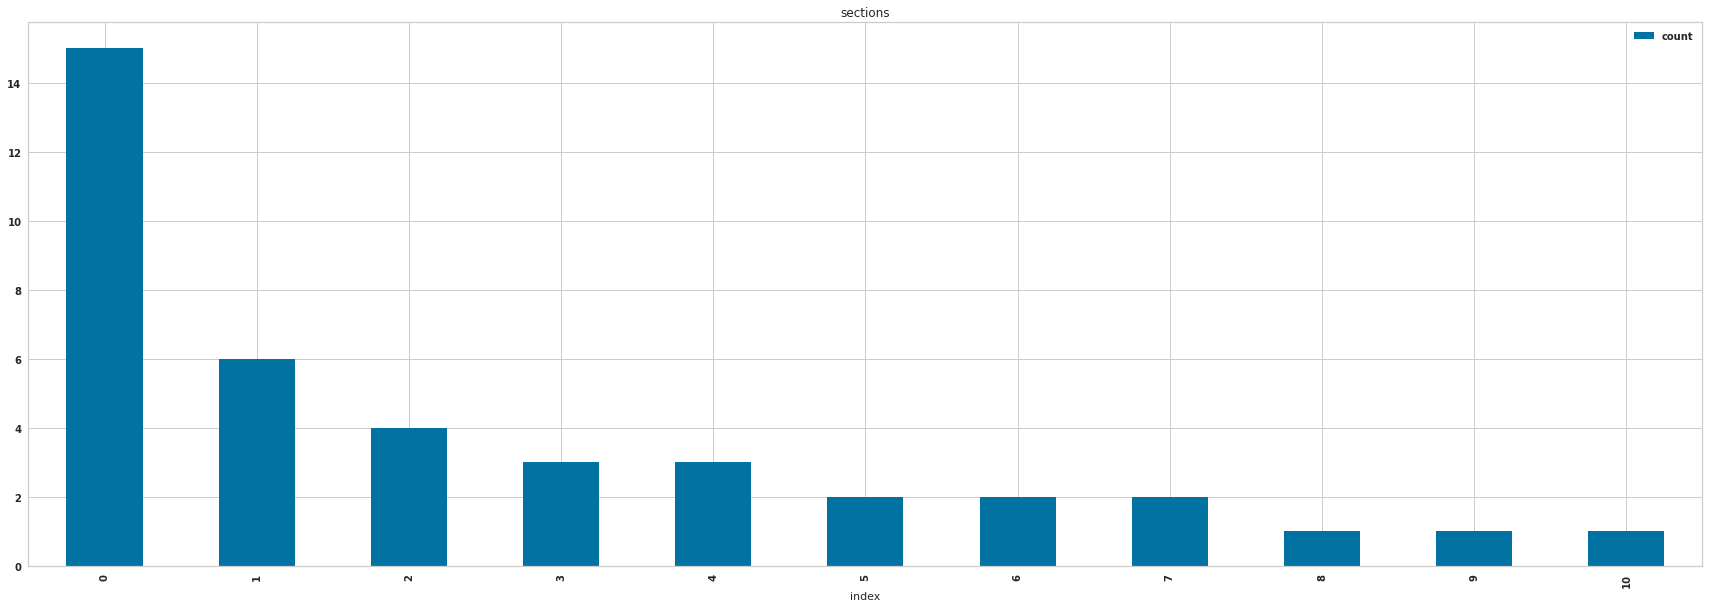

                                                name  count
0  [{'name': b'KERNEL32.DLL', 'functions': ['Load...     15
1  [{'name': b'KERNEL32.dll', 'functions': ['Crea...      7
2  [{'name': b'KERNEL32.DLL', 'functions': ['Load...      6
3  [{'name': b'KERNEL32.DLL', 'functions': ['Load...      3
4  [{'name': b'ADVAPI32.dll', 'functions': ['RegS...      3
5  [{'name': b'ADVAPI32.dll', 'functions': ['RegS...      2
6  [{'name': b'ADVAPI32.dll', 'functions': ['RegS...      2
7  [{'name': b'KERNEL32.dll', 'functions': ['GetM...      1
8  [{'name': b'ADVAPI32.dll', 'functions': ['RegS...      1


<Figure size 1440x360 with 0 Axes>

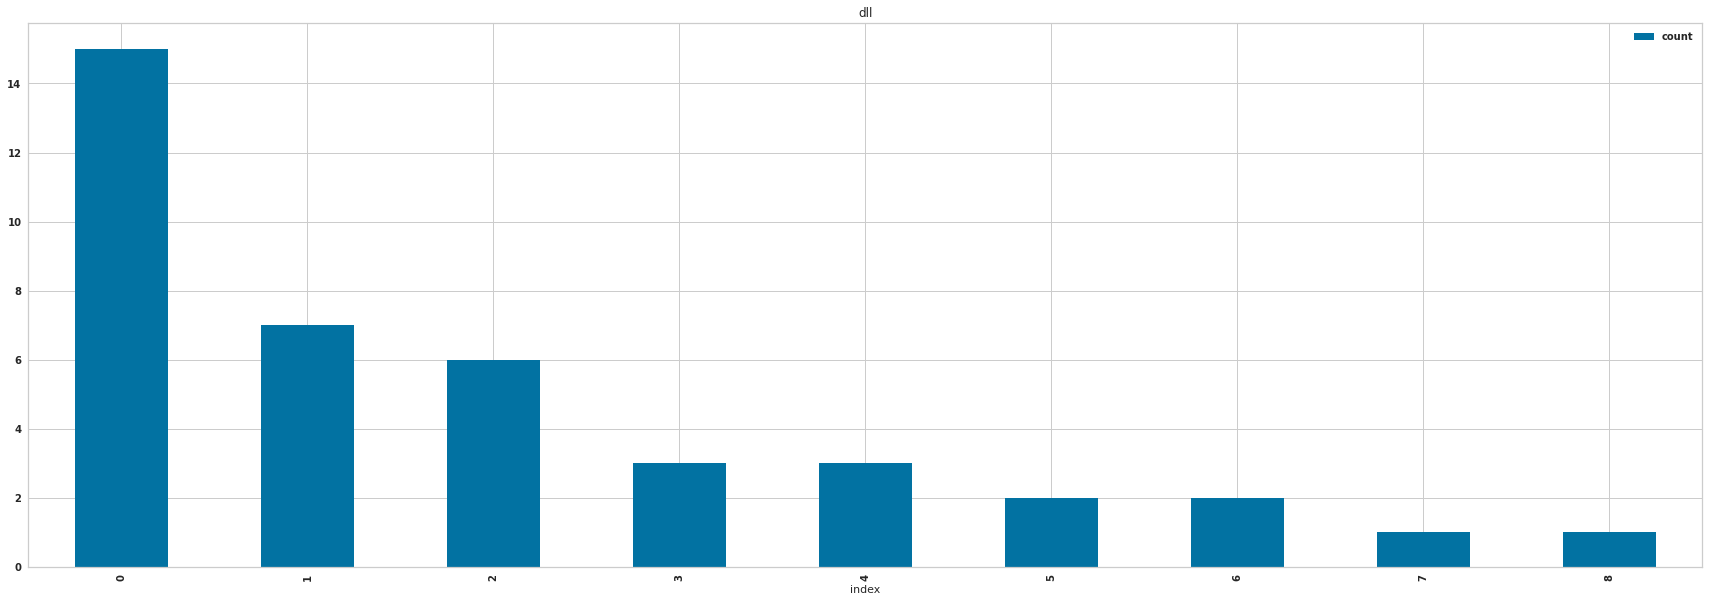

                            name  count
0   Thu May 14 17:12:40 2009 UTC     12
1   Fri Jan 15 17:20:56 2010 UTC      6
2   Tue Sep 28 08:09:41 2010 UTC      4
3   Mon May 30 08:29:29 2011 UTC      3
4   Sun Nov 18 23:50:13 2007 UTC      3
5   Wed Oct 19 09:19:09 2011 UTC      2
6   Tue Jan 11 03:22:02 2011 UTC      2
7   Wed Feb  3 08:22:33 2010 UTC      1
8   Fri Jul 29 07:10:31 2011 UTC      1
9   Fri Aug 19 03:07:37 2011 UTC      1
10  Tue Aug  9 08:15:29 2011 UTC      1
11  Tue Apr 20 03:39:27 2010 UTC      1
12  Tue Feb  9 08:29:43 2010 UTC      1
13  Thu Aug 11 13:15:49 2011 UTC      1
14  Wed Oct 19 09:16:10 2011 UTC      1


<Figure size 1440x360 with 0 Axes>

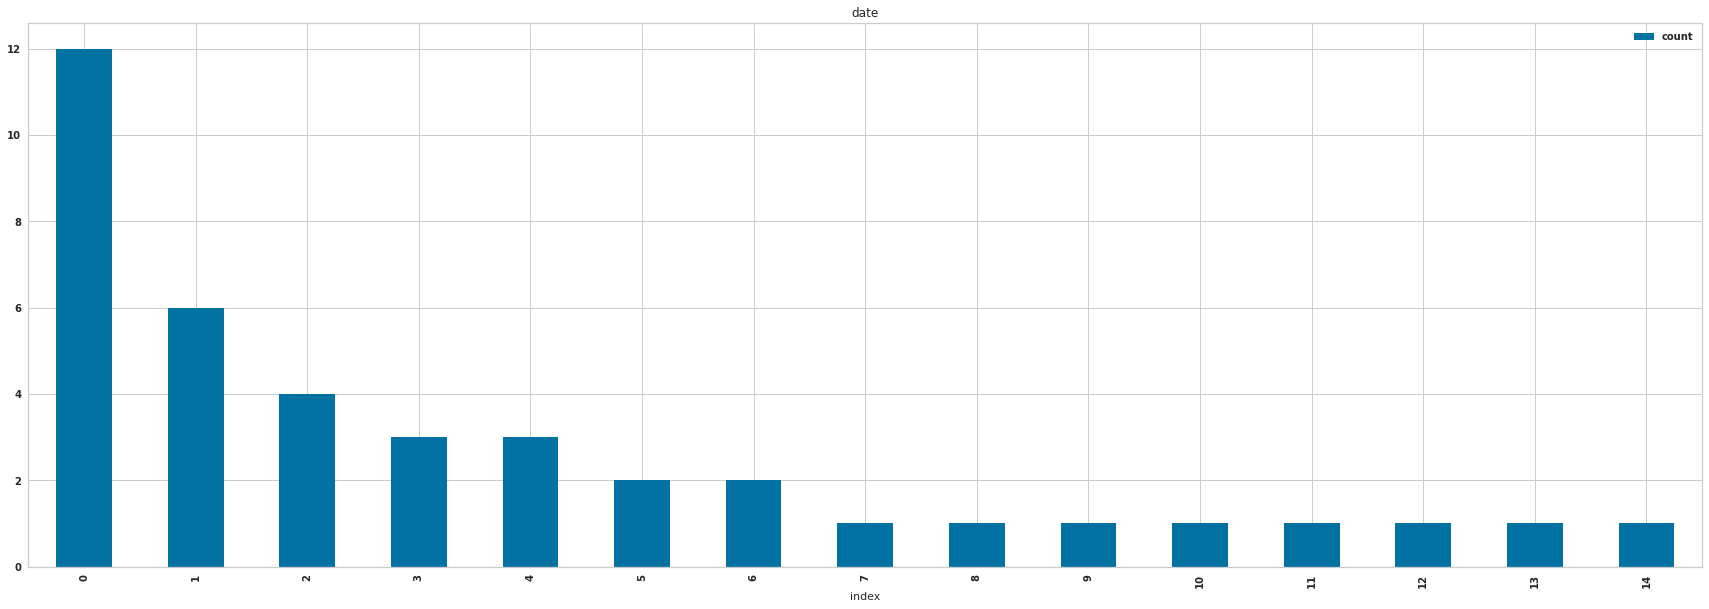

In [77]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

for var in data.columns:
  plt.figure(figsize=(20,5))

  sf=data[var].value_counts()
  labels = pd.DataFrame({'name':sf.index, 'count':sf.values})
  labels['index'] = labels.index

  labels.plot(x="index", y=["count"], kind="bar")
  print(labels[["name", "count"]])
  plt.rcParams["figure.figsize"] = (30,10)
  plt.title(var)
  plt.show()

# Grafica codo

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 117.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 117.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 117.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 117.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 117.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 98.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 108.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, ite

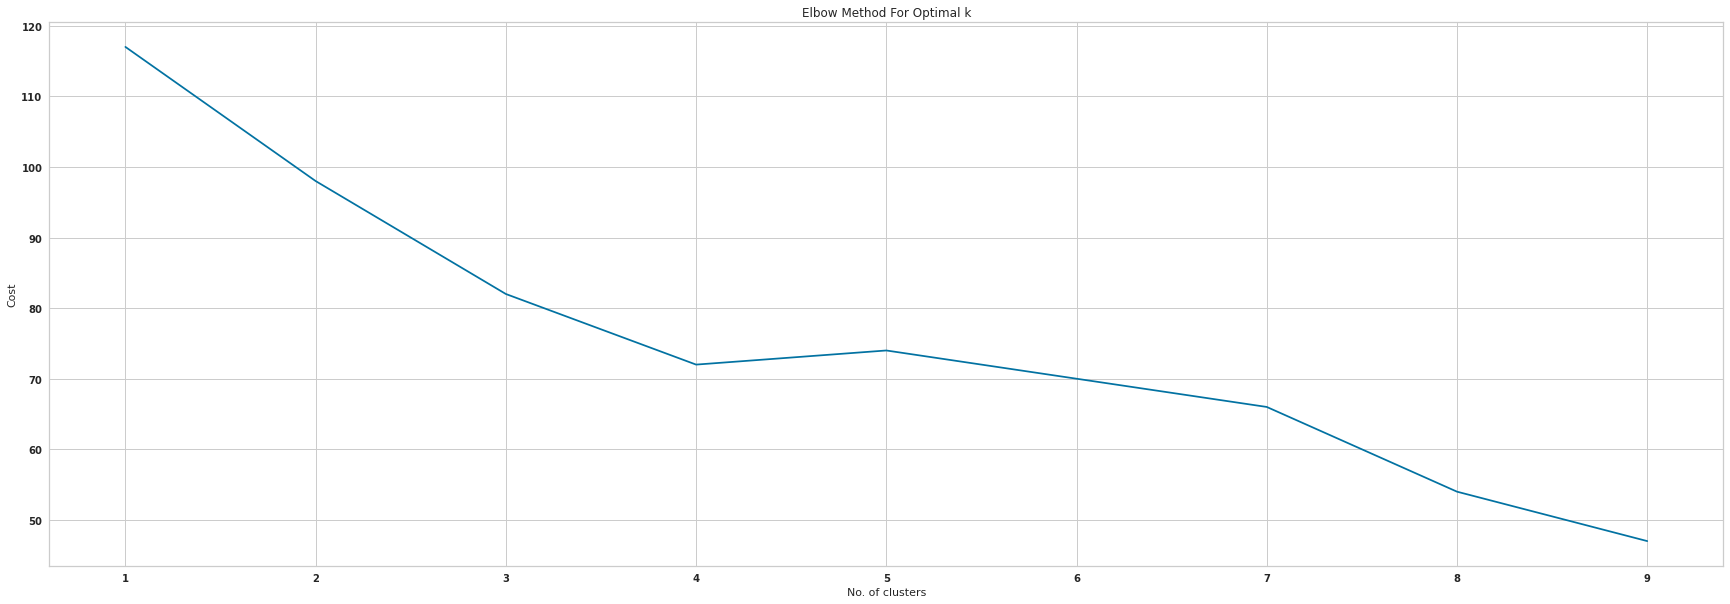

In [78]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

# Construyendo modelo

In [92]:
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 93.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 112.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2, cost: 76.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 100.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 95.0
Best run was number 3


In [93]:
data["Cluster"] = clusters
data.head()

,filename,sections,dll,date,Cluster
0,RTC_7F85D7F628CE62D1D8F7B39D8940472,"[['IMAGE_SECTION_HEADER', '0x1000', '0x1ef000'...","[{'name': b'KERNEL32.DLL', 'functions': ['Load...",Mon May 30 08:29:29 2011 UTC,0
1,FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2,"[['IMAGE_SECTION_HEADER', '0x1000', '0x5000', ...","[{'name': b'KERNEL32.DLL', 'functions': ['Load...",Thu May 14 17:12:40 2009 UTC,3
2,1F2EB7B090018D975E6D9B40868C94CA,"[['IMAGE_SECTION_HEADER', '0x1000', '0x5000', ...","[{'name': b'KERNEL32.DLL', 'functions': ['Load...",Fri Jan 15 17:20:56 2010 UTC,1
3,65018CD542145A3792BA09985734C12A,"[['IMAGE_SECTION_HEADER', '0x1000', '0x5000', ...","[{'name': b'KERNEL32.DLL', 'functions': ['Load...",Sun Nov 18 23:50:13 2007 UTC,3
4,FHHH6576C196385407B0F7F4B1B537D88983,"[['IMAGE_SECTION_HEADER', '0x1000', '0x5000', ...","[{'name': b'KERNEL32.DLL', 'functions': ['Load...",Thu May 14 17:12:40 2009 UTC,3


# Grafica

In [96]:
from sklearn.decomposition import PCA
pca = PCA(2)

plot_columns = pca.fit_transform(data.iloc[:,0:12])

plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=data["Clusters"], s=30)
plt.show()

ValueError: could not convert string to float: 'RTC_7F85D7F628CE62D1D8F7B39D8940472'